## Import Libraries:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

## Import Clean Table:

In [9]:
df = pd.read_csv("../data/clean/final_df.csv")

In [10]:
# Ensure date_time is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = pd.to_datetime(df['year'])
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'])

# Confirm data types
print(df.dtypes)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/1757940005.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


client_id                    int64
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
Variation                   object
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
year                datetime64[ns]
date                datetime64[ns]
time                datetime64[ns]
dtype: object


---

# Find Ideal Customer Analysis

### Analysis by Gender and Age Group

In [16]:
# Create age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, float('inf')]
age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
df['age_group'] = pd.cut(df['clnt_age'], bins=age_bins, labels=age_labels, right=False)

In [18]:
# Analyse gender distribution
gender_distribution = df['gendr'].value_counts(normalize=True) * 100
print("Gender Distribution (in %):")
print(gender_distribution)

Gender Distribution (in %):
gendr
M    33.772659
U    33.712842
F    32.511385
X     0.003113
Name: proportion, dtype: float64


/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/3116363945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gendr', palette='Set2')


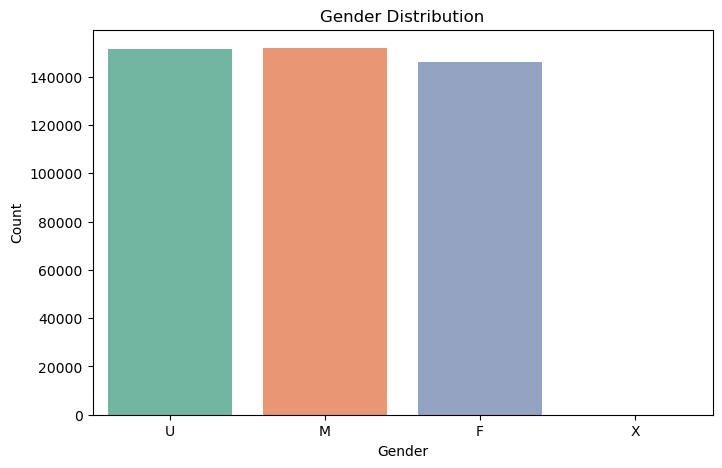

In [20]:
# Visualize Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gendr', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [22]:
# Analyze gender distribution by age group
gender_age_group_distribution = df.groupby(['age_group', 'gendr']).size().unstack().fillna(0)
display(gender_age_group_distribution)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/3062669811.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_group_distribution = df.groupby(['age_group', 'gendr']).size().unstack().fillna(0)


gendr          F      M      U  X
age_group                        
<20         1196   1313   5021  0
20-30      13615  17218  40454  3
30-40      22850  25591  27609  0
40-50      26166  27285  22593  5
50-60      38192  36392  29300  6
60-70      32006  30948  20837  0
70+        12180  13130   5794  0

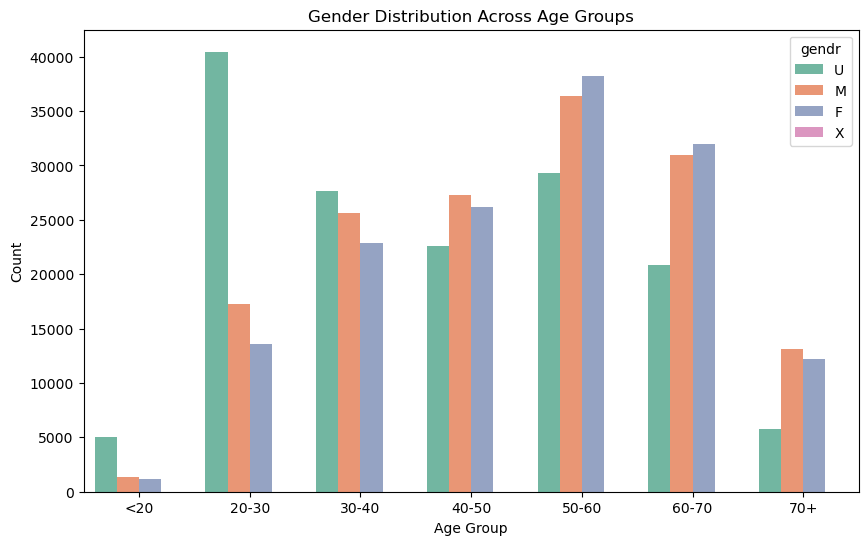

In [24]:
# Visualize Age Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='gendr', palette='Set2')
plt.title('Gender Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### Analysis of Client's Tenure by age and gender:

In [27]:
# Grouping by gender and age group to analyze tenure
tenure_analysis = df.groupby(['gendr', 'age_group'])['clnt_tenure_mnth'].agg(['mean', 'median', 'max']).reset_index()

# Sorting to see which gender and age group has the longest average tenure
sorted_tenure = tenure_analysis.sort_values(by='max', ascending=False)

# Displaying the results
print("Tenure Analysis by Gender and Age Group:")
display(tenure_analysis)

print("\nSorted by Maximum Tenure:")
display(sorted_tenure)

Tenure Analysis by Gender and Age Group:


/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/956464289.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_analysis = df.groupby(['gendr', 'age_group'])['clnt_tenure_mnth'].agg(['mean', 'median', 'max']).reset_index()


gendr age_group        mean  median    max
0      F       <20  192.526756   209.0  325.0
1      F     20-30  155.033639   140.0  449.0
2      F     30-40  159.903895   157.0  655.0
3      F     40-50  181.527861   178.0  668.0
4      F     50-60  189.746308   178.0  749.0
5      F     60-70  200.201743   185.0  667.0
6      F       70+  224.147126   203.0  668.0
7      M       <20  193.099010   197.0  532.0
8      M     20-30  155.312406   140.0  516.0
9      M     30-40  160.417412   156.0  596.0
10     M     40-50  182.018398   179.0  669.0
11     M     50-60  195.178885   188.0  610.0
12     M     60-70  200.477995   189.0  610.0
13     M       70+  232.459482   225.0  602.0
14     U       <20   72.736308    66.0  303.0
15     U     20-30   77.218940    72.0  411.0
16     U     30-40   84.084067    78.0  569.0
17     U     40-50   93.031913    80.0  482.0
18     U     50-60   91.492218    80.0  466.0
19     U     60-70   96.612900    82.0  504.0
20     U       70+  107.736279    84.0  669.0
21     X       <20         NaN     NaN    NaN
22     X     20-30  113.000000   113.0  113.0
23     X     30-40         NaN     NaN    NaN
24     X     40-50  136.000000   136.0  136.0
25     X     50-60  110.000000   110.0  110.0
26     X     60-70         NaN     NaN    NaN
27     X       70+         NaN     NaN    NaN


Sorted by Maximum Tenure:


gendr age_group        mean  median    max
4      F     50-60  189.746308   178.0  749.0
10     M     40-50  182.018398   179.0  669.0
20     U       70+  107.736279    84.0  669.0
3      F     40-50  181.527861   178.0  668.0
6      F       70+  224.147126   203.0  668.0
5      F     60-70  200.201743   185.0  667.0
2      F     30-40  159.903895   157.0  655.0
12     M     60-70  200.477995   189.0  610.0
11     M     50-60  195.178885   188.0  610.0
13     M       70+  232.459482   225.0  602.0
9      M     30-40  160.417412   156.0  596.0
16     U     30-40   84.084067    78.0  569.0
7      M       <20  193.099010   197.0  532.0
8      M     20-30  155.312406   140.0  516.0
19     U     60-70   96.612900    82.0  504.0
17     U     40-50   93.031913    80.0  482.0
18     U     50-60   91.492218    80.0  466.0
1      F     20-30  155.033639   140.0  449.0
15     U     20-30   77.218940    72.0  411.0
0      F       <20  192.526756   209.0  325.0
14     U       <20   72.736308    66.0  303.0
24     X     40-50  136.000000   136.0  136.0
22     X     20-30  113.000000   113.0  113.0
25     X     50-60  110.000000   110.0  110.0
21     X       <20         NaN     NaN    NaN
23     X     30-40         NaN     NaN    NaN
26     X     60-70         NaN     NaN    NaN
27     X       70+         NaN     NaN    NaN

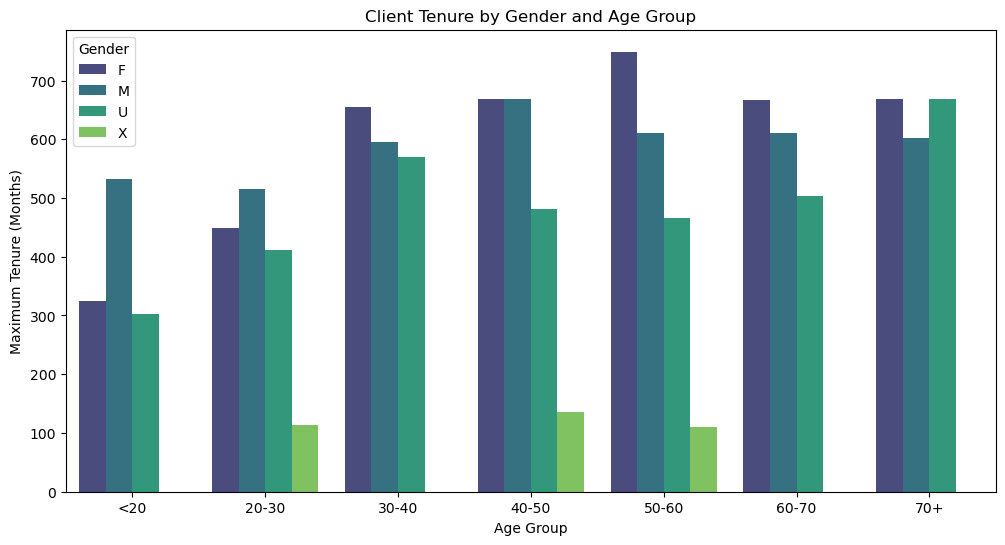

In [29]:
# Bar plot for maximum tenure by gender and age group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='max', hue='gendr', data=sorted_tenure, palette='viridis')
plt.title('Client Tenure by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Maximum Tenure (Months)')
plt.legend(title='Gender')
plt.show()

### Result from Customer Metrics:
- The distribution shows a relatively balanced gender split among users, with males (M) representing around 33.8%, females (F) around 32.5%, and users with undefined or unclassified genders (U) also making up 33.7%.
- Primary clients do not skew heavily toward any specific gender.
- The largest proportion of clients falls in the 50-60 and 60-70 age groups, indicating that the majority of users are older.
- There is also a significant number of users in the 30-40 and 40-50 age groups.
- The youngest age group (<20) has the fewest users.
- The results indicate that the oldest clients (70+) have the longest average tenure, followed by the 60-70 and 50-60 age groups.
- Female clients in the 50-60 age group have the longest maximum tenure (749 months), suggesting that older clients tend to stay with the service longer.



### Conclusion from Customer Metrics:
- Focus future Analysis on 2 Age Groups 30-50 and 50-70
- Best Clients are Female in the 50-60 Age Group

---

# Completion Rate Analysis

### Time Spent per Step

In [36]:
# Filter the data for age groups 30-50 and 50-70
df_filtered = df[(df['clnt_age'] >= 30) & (df['clnt_age'] <= 70)]
df_filtered['age_group'] = pd.cut(df_filtered['clnt_age'], bins=[30, 50, 70], labels=['30-50', '50-70'], right=False)

# Sort the data by client_id, visit_id, and date_time for proper time analysis
df_sorted = df_filtered.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Calculate time differences for each client between steps
df_sorted['time_diff'] = df_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

# Drop rows where time_diff is NaN
df_sorted = df_sorted.dropna(subset=['time_diff'])

# Display the filtered data to verify the changes
df_sorted

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/2632141121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = pd.cut(df_filtered['clnt_age'], bins=[30, 50, 70], labels=['30-50', '50-70'], right=False)


client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
381111        169            21.0             262.0      47.5     M   
381110        169            21.0             262.0      47.5     M   
381109        169            21.0             262.0      47.5     M   
381108        169            21.0             262.0      47.5     M   
9748          647            12.0             151.0      57.5     M   
...           ...             ...               ...       ...   ...   
310095    9999729            10.0             124.0      31.0     F   
310094    9999729            10.0             124.0      31.0     F   
310093    9999729            10.0             124.0      31.0     F   
310087    9999729            10.0             124.0      31.0     F   
51308     9999832            23.0             281.0      49.0     F   

        num_accts        bal  calls_6_mnth  logons_6_mnth  Variation  \
381111        2.0  501570.72           4.0            4.0  undefined   
381110        2.0  501570.72           4.0            4.0  undefined   
381109        2.0  501570.72           4.0            4.0  undefined   
381108        2.0  501570.72           4.0            4.0  undefined   
9748          2.0   30525.80           0.0            4.0       Test   
...           ...        ...           ...            ...        ...   
310095        3.0  107059.74           6.0            9.0       Test   
310094        3.0  107059.74           6.0            9.0       Test   
310093        3.0  107059.74           6.0            9.0       Test   
310087        3.0  107059.74           6.0            9.0       Test   
51308         2.0  431887.61           1.0            4.0       Test   

                   visitor_id                      visit_id process_step  \
381111  201385055_71273495308  749567106_99161211863_557568       step_1   
381110  201385055_71273495308  749567106_99161211863_557568       step_2   
381109  201385055_71273495308  749567106_99161211863_557568       step_3   
381108  201385055_71273495308  749567106_99161211863_557568      confirm   
9748     66758770_53988066587   40369564_40101682850_311847       step_1   
...                       ...                           ...          ...   
310095  834634258_21862004160  870243567_56915814033_814203       step_2   
310094  834634258_21862004160  870243567_56915814033_814203       step_3   
310093  834634258_21862004160  870243567_56915814033_814203      confirm   
310087  604429154_69247391147   99583652_41711450505_426179       step_1   
51308   145538019_54444341400  472154369_16714624241_585315       step_1   

                 date_time                          year       date  \
381111 2017-04-12 20:19:45 1970-01-01 00:00:00.000002017 2017-04-12   
381110 2017-04-12 20:20:31 1970-01-01 00:00:00.000002017 2017-04-12   
381109 2017-04-12 20:22:05 1970-01-01 00:00:00.000002017 2017-04-12   
381108 2017-04-12 20:23:09 1970-01-01 00:00:00.000002017 2017-04-12   
9748   2017-04-12 15:41:35 1970-01-01 00:00:00.000002017 2017-04-12   
...                    ...                           ...        ...   
310095 2017-05-08 16:08:40 1970-01-01 00:00:00.000002017 2017-05-08   
310094 2017-05-08 16:09:19 1970-01-01 00:00:00.000002017 2017-05-08   
310093 2017-05-08 16:09:40 1970-01-01 00:00:00.000002017 2017-05-08   
310087 2017-04-05 13:41:04 1970-01-01 00:00:00.000002017 2017-04-05   
51308  2017-05-16 16:46:11 1970-01-01 00:00:00.000002017 2017-05-16   

                      time age_group  time_diff  
381111 2024-09-12 20:19:45     30-50        9.0  
381110 2024-09-12 20:20:31     30-50       46.0  
381109 2024-09-12 20:22:05     30-50       94.0  
381108 2024-09-12 20:23:09     30-50       64.0  
9748   2024-09-12 15:41:35     50-70        7.0  
...                    ...       ...        ...  
310095 2024-09-12 16:08:40     30-50       10.0  
310094 2024-09-12 16:09:19     30-50       39.0  
310093 2024-09-12 16:09:40     30-50       21.0  
310087 2024-09-12 13:41:

In [38]:
# Group by age group, variation (Test/Control), and process step to calculate average time spent
avg_time_by_group_age = df_sorted.groupby(['age_group', 'Variation', 'process_step'])['time_diff'].mean().reset_index()
display(avg_time_by_group_age)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/3771357340.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_group_age = df_sorted.groupby(['age_group', 'Variation', 'process_step'])['time_diff'].mean().reset_index()


age_group  Variation process_step   time_diff
0      30-50    Control      confirm  109.840705
1      30-50    Control        start  143.715692
2      30-50    Control       step_1   36.525214
3      30-50    Control       step_2   31.689091
4      30-50    Control       step_3   99.162427
5      30-50       Test      confirm  101.573098
6      30-50       Test        start  141.717002
7      30-50       Test       step_1   32.530996
8      30-50       Test       step_2   38.872408
9      30-50       Test       step_3  102.025082
10     30-50  undefined      confirm  114.505327
11     30-50  undefined        start  142.563291
12     30-50  undefined       step_1   35.249671
13     30-50  undefined       step_2   40.380016
14     30-50  undefined       step_3  108.289691
15     50-70    Control      confirm  150.148668
16     50-70    Control        start  162.978090
17     50-70    Control       step_1   49.024477
18     50-70    Control       step_2   46.979771
19     50-70    Control       step_3   93.208656
20     50-70       Test      confirm  156.271309
21     50-70       Test        start  152.297384
22     50-70       Test       step_1   41.891174
23     50-70       Test       step_2   54.781194
24     50-70       Test       step_3   96.772662
25     50-70  undefined      confirm  155.457183
26     50-70  undefined        start  159.526724
27     50-70  undefined       step_1   48.801283
28     50-70  undefined       step_2   51.149694
29     50-70  undefined       step_3   90.562725

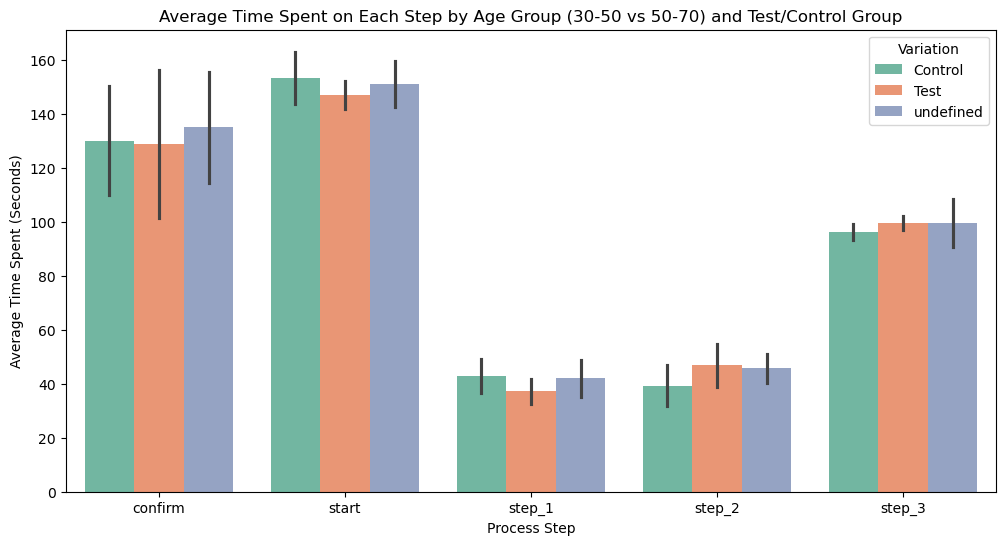

In [40]:
# Visualize the time spent on each step by age group and variation
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='time_diff', hue='Variation', data=avg_time_by_group_age, palette='Set2')
plt.title('Average Time Spent on Each Step by Age Group (30-50 vs 50-70) and Test/Control Group')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Variation')
plt.show()

In [42]:
# Identify users who reached the 'confirm' step
df_sorted['completed'] = df_sorted['process_step'] == 'confirm'

# Calculate the completion rate by variation and age group
completion_rate = df_sorted.groupby(['Variation', 'age_group'])['completed'].mean().reset_index()
display(completion_rate)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/1483812649.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  completion_rate = df_sorted.groupby(['Variation', 'age_group'])['completed'].mean().reset_index()


Variation age_group  completed
0    Control     30-50   0.157369
1    Control     50-70   0.148531
2       Test     30-50   0.172759
3       Test     50-70   0.146320
4  undefined     30-50   0.165239
5  undefined     50-70   0.144391

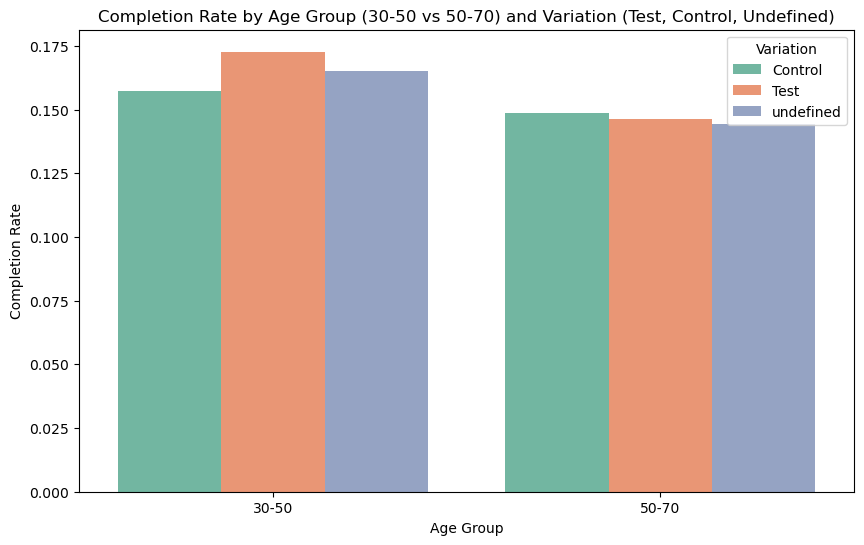

In [44]:
# Visualize the completion rate by variation and age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='completed', hue='Variation', data=completion_rate, palette='Set2')
plt.title('Completion Rate by Age Group (30-50 vs 50-70) and Variation (Test, Control, Undefined)')
plt.ylabel('Completion Rate')
plt.xlabel('Age Group')
plt.legend(title='Variation')
plt.show()

### Time Spent per step with comparison by Age Group

In [47]:
# Define the age bins
age_bins = [30, 50, 70]
age_labels = ['30-50', '50-70']

# Create a new column for age group
df['age_group'] = pd.cut(df['clnt_age'], bins=age_bins, labels=age_labels, right=False)

# Filter the data for age groups 30-50 and 50-70
filtered_df = df[df['age_group'].isin(['30-50', '50-70'])]
display(filtered_df)

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
0          836976             6.0              73.0      60.5     U   
1          836976             6.0              73.0      60.5     U   
2          836976             6.0              73.0      60.5     U   
3          836976             6.0              73.0      60.5     U   
4          836976             6.0              73.0      60.5     U   
...           ...             ...               ...       ...   ...   
449699    5602139            21.0             254.0      59.5     F   
449700    5602139            21.0             254.0      59.5     F   
449701    5602139            21.0             254.0      59.5     F   
449702    5602139            21.0             254.0      59.5     F   
449703    5602139            21.0             254.0      59.5     F   

        num_accts        bal  calls_6_mnth  logons_6_mnth  Variation  \
0             2.0   45105.30           6.0            9.0       Test   
1             2.0   45105.30           6.0            9.0       Test   
2             2.0   45105.30           6.0            9.0       Test   
3             2.0   45105.30           6.0            9.0       Test   
4             2.0   45105.30           6.0            9.0       Test   
...           ...        ...           ...            ...        ...   
449699        3.0  157498.73           7.0            7.0  undefined   
449700        3.0  157498.73           7.0            7.0  undefined   
449701        3.0  157498.73           7.0            7.0  undefined   
449702        3.0  157498.73           7.0            7.0  undefined   
449703        3.0  157498.73           7.0            7.0  undefined   

                   visitor_id                      visit_id process_step  \
0        427070339_1413275162   228976764_46825473280_96584      confirm   
1        427070339_1413275162   228976764_46825473280_96584      confirm   
2        427070339_1413275162   228976764_46825473280_96584      confirm   
3        427070339_1413275162   228976764_46825473280_96584       step_3   
4        427070339_1413275162   228976764_46825473280_96584       step_2   
...                       ...                           ...          ...   
449699  962766819_57063135389    158544612_4105226940_43043      confirm   
449700  962766819_57063135389    158544612_4105226940_43043       step_3   
449701  962766819_57063135389    158544612_4105226940_43043       step_2   
449702  962766819_57063135389  884309593_49820690623_654151       step_1   
449703  962766819_57063135389  884309593_49820690623_654151        start   

                 date_time                          year       date  \
0      2017-04-02 11:51:13 1970-01-01 00:00:00.000002017 2017-04-02   
1      2017-04-02 11:47:50 1970-01-01 00:00:00.000002017 2017-04-02   
2      2017-04-02 11:46:45 1970-01-01 00:00:00.000002017 2017-04-02   
3      2017-04-02 11:23:08 1970-01-01 00:00:00.000002017 2017-04-02   
4      2017-04-02 11:22:24 1970-01-01 00:00:00.000002017 2017-04-02   
...                    ...                           ...        ...   
449699 2017-04-05 11:48:02 1970-01-01 00:00:00.000002017 2017-04-05   
449700 2017-04-05 11:44:07 1970-01-01 00:00:00.000002017 2017-04-05   
449701 2017-04-05 11:43:10 1970-01-01 00:00:00.000002017 2017-04-05   
449702 2017-04-05 11:41:32 1970-01-01 00:00:00.000002017 2017-04-05   
449703 2017-04-05 11:41:04 1970-01-01 00:00:00.000002017 2017-04-05   

                      time age_group  
0      2024-09-12 11:51:13     50-70  
1      2024-09-12 11:47:50     50-70  
2      2024-09-12 11:46:45     50-70  
3      2024-09-12 11:23:08     50-70  
4      2024-09-12 11:22:24     50-70  
...                    ...       ...  
449699 2024-09-12 11:48:02     50-70  
449700 2024-09-12 11:44:07     50-70  
449701 2024-09-12 11:43:10     50-70  
449702 2024-09-12 11:41:32     50-70  
449703 2024-09-12 11:41:04     50-70  

[339780 rows x 18 columns]

In [49]:
# Ensure the date_time column is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Sort the data by client_id, visit_id, and date_time
df_sorted = filtered_df.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Calculate time differences for each client between steps (in seconds)
df_sorted['time_diff'] = df_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

# Drop the first occurrence where time_diff is NaN
df_sorted.dropna(subset=['time_diff'], inplace=True)

In [51]:
display(df_sorted)

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
381111        169            21.0             262.0      47.5     M   
381110        169            21.0             262.0      47.5     M   
381109        169            21.0             262.0      47.5     M   
381108        169            21.0             262.0      47.5     M   
9748          647            12.0             151.0      57.5     M   
...           ...             ...               ...       ...   ...   
310095    9999729            10.0             124.0      31.0     F   
310094    9999729            10.0             124.0      31.0     F   
310093    9999729            10.0             124.0      31.0     F   
310087    9999729            10.0             124.0      31.0     F   
51308     9999832            23.0             281.0      49.0     F   

        num_accts        bal  calls_6_mnth  logons_6_mnth  Variation  \
381111        2.0  501570.72           4.0            4.0  undefined   
381110        2.0  501570.72           4.0            4.0  undefined   
381109        2.0  501570.72           4.0            4.0  undefined   
381108        2.0  501570.72           4.0            4.0  undefined   
9748          2.0   30525.80           0.0            4.0       Test   
...           ...        ...           ...            ...        ...   
310095        3.0  107059.74           6.0            9.0       Test   
310094        3.0  107059.74           6.0            9.0       Test   
310093        3.0  107059.74           6.0            9.0       Test   
310087        3.0  107059.74           6.0            9.0       Test   
51308         2.0  431887.61           1.0            4.0       Test   

                   visitor_id                      visit_id process_step  \
381111  201385055_71273495308  749567106_99161211863_557568       step_1   
381110  201385055_71273495308  749567106_99161211863_557568       step_2   
381109  201385055_71273495308  749567106_99161211863_557568       step_3   
381108  201385055_71273495308  749567106_99161211863_557568      confirm   
9748     66758770_53988066587   40369564_40101682850_311847       step_1   
...                       ...                           ...          ...   
310095  834634258_21862004160  870243567_56915814033_814203       step_2   
310094  834634258_21862004160  870243567_56915814033_814203       step_3   
310093  834634258_21862004160  870243567_56915814033_814203      confirm   
310087  604429154_69247391147   99583652_41711450505_426179       step_1   
51308   145538019_54444341400  472154369_16714624241_585315       step_1   

                 date_time                          year       date  \
381111 2017-04-12 20:19:45 1970-01-01 00:00:00.000002017 2017-04-12   
381110 2017-04-12 20:20:31 1970-01-01 00:00:00.000002017 2017-04-12   
381109 2017-04-12 20:22:05 1970-01-01 00:00:00.000002017 2017-04-12   
381108 2017-04-12 20:23:09 1970-01-01 00:00:00.000002017 2017-04-12   
9748   2017-04-12 15:41:35 1970-01-01 00:00:00.000002017 2017-04-12   
...                    ...                           ...        ...   
310095 2017-05-08 16:08:40 1970-01-01 00:00:00.000002017 2017-05-08   
310094 2017-05-08 16:09:19 1970-01-01 00:00:00.000002017 2017-05-08   
310093 2017-05-08 16:09:40 1970-01-01 00:00:00.000002017 2017-05-08   
310087 2017-04-05 13:41:04 1970-01-01 00:00:00.000002017 2017-04-05   
51308  2017-05-16 16:46:11 1970-01-01 00:00:00.000002017 2017-05-16   

                      time age_group  time_diff  
381111 2024-09-12 20:19:45     30-50        9.0  
381110 2024-09-12 20:20:31     30-50       46.0  
381109 2024-09-12 20:22:05     30-50       94.0  
381108 2024-09-12 20:23:09     30-50       64.0  
9748   2024-09-12 15:41:35     50-70        7.0  
...                    ...       ...        ...  
310095 2024-09-12 16:08:40     30-50       10.0  
310094 2024-09-12 16:09:19     30-50       39.0  
310093 2024-09-12 16:09:40     30-50       21.0  
310087 2024-09-12 13:41:

In [53]:
# Set the correct order for process_step
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_sorted['process_step'] = pd.Categorical(df_sorted['process_step'], categories=step_order, ordered=True)

In [55]:
# Group by gender, age group, and process step to calculate mean time spent
avg_time_by_group = df_sorted.groupby(['gendr', 'age_group', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_group.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/208393966.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_group = df_sorted.groupby(['gendr', 'age_group', 'process_step'])['time_diff'].mean().reset_index()


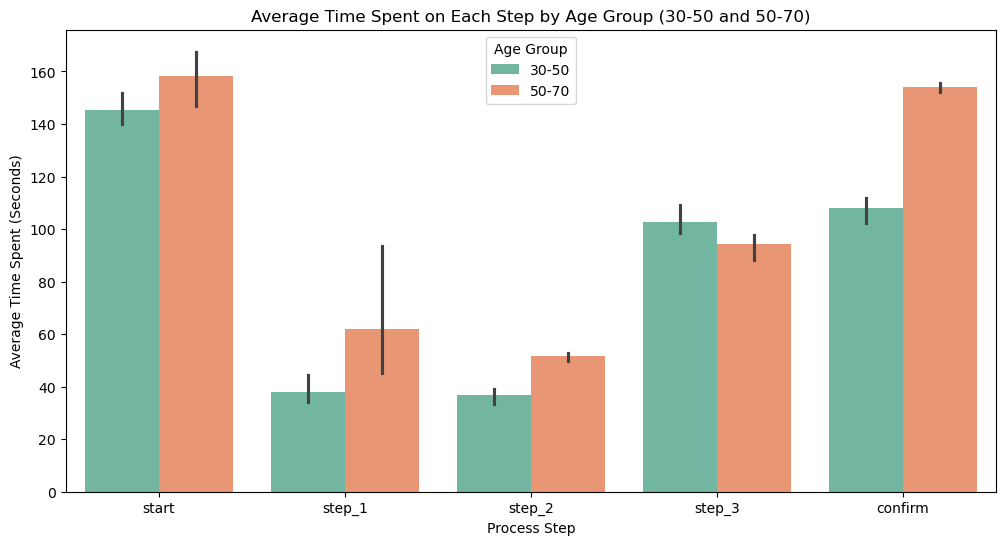

In [57]:
# Bar plot to visualize average time spent by age group and process step
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='age_group', data=avg_time_by_group, palette='Set2')
plt.title('Average Time Spent on Each Step by Age Group (30-50 and 50-70)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Age Group')
plt.show()

In [59]:
# Exporting data to CSV for Tableau
df_sorted[['client_id', 'visitor_id', 'gendr', 'age_group', 'process_step', 'time_diff']].to_csv('time_spent_per_step.csv', index=False)

### Time Spent per Step comparing Tested&Controlled Groups and by Age

In [62]:
# Filter only for Test group
df_test = df_sorted[df_sorted['Variation'] == 'Test']

# Group by age group and process step to calculate average time spent
avg_time_by_test_group = df_test.groupby(['age_group', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_test_group.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/2616895982.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_test_group = df_test.groupby(['age_group', 'process_step'])['time_diff'].mean().reset_index()


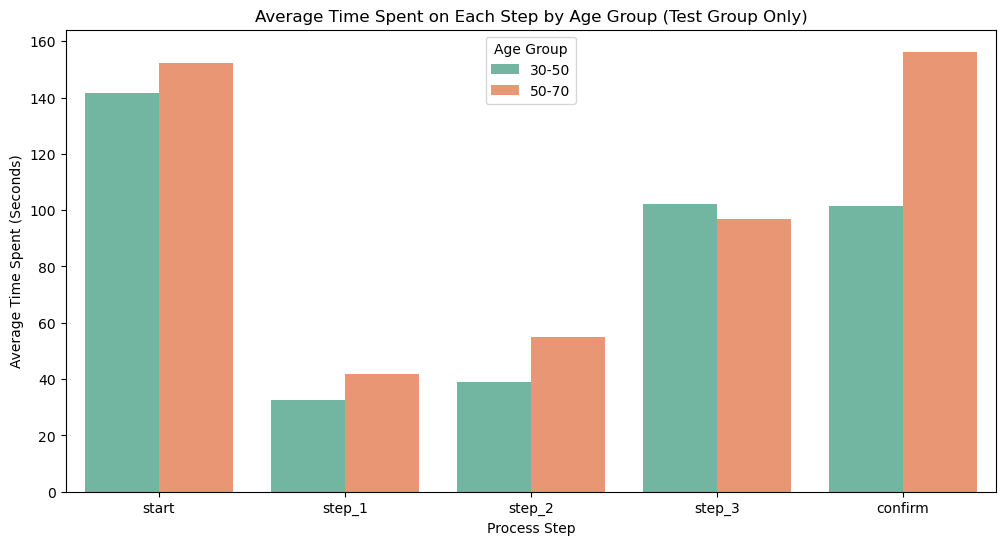

In [64]:
# Bar plot to visualize average time spent by age group and process step for Test group only
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='age_group', data=avg_time_by_test_group, palette='Set2')
plt.title('Average Time Spent on Each Step by Age Group (Test Group Only)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Age Group')
plt.show()

In [66]:
# Filter only for Control group
df_control = df_sorted[df_sorted['Variation'] == 'Control']

# Group by age group and process step to calculate average time spent
avg_time_by_control_group = df_control.groupby(['age_group', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_control_group.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/879839180.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_control_group = df_control.groupby(['age_group', 'process_step'])['time_diff'].mean().reset_index()


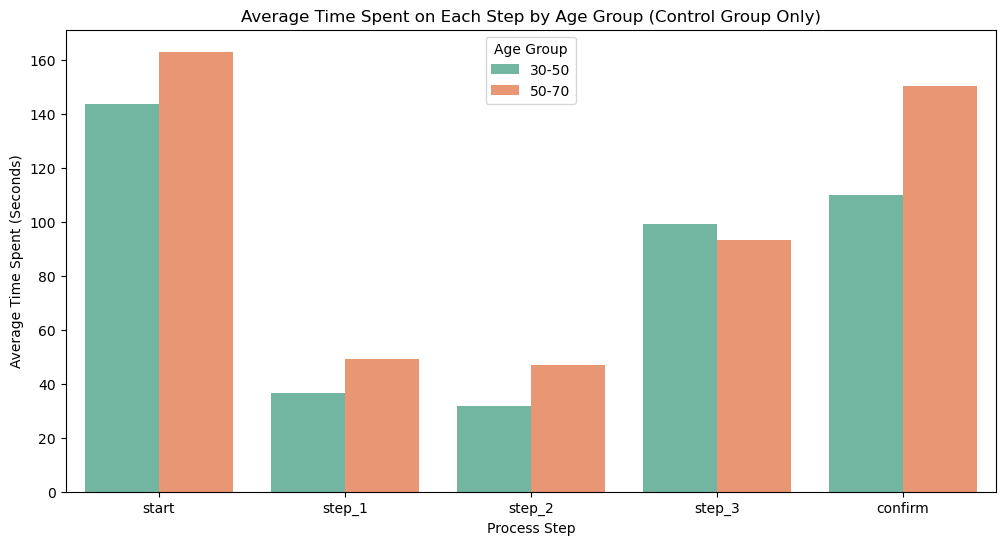

In [68]:
# Bar plot to visualize average time spent by age group and process step for Control group only
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='age_group', data=avg_time_by_control_group, palette='Set2')
plt.title('Average Time Spent on Each Step by Age Group (Control Group Only)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Age Group')
plt.show()

### Time Spent on Each Steps by Gender


In [71]:
# Group by gender and process step to calculate average time spent for Test group
avg_time_by_gender_test = df_test.groupby(['gendr', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_gender_test.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/748248707.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_gender_test = df_test.groupby(['gendr', 'process_step'])['time_diff'].mean().reset_index()


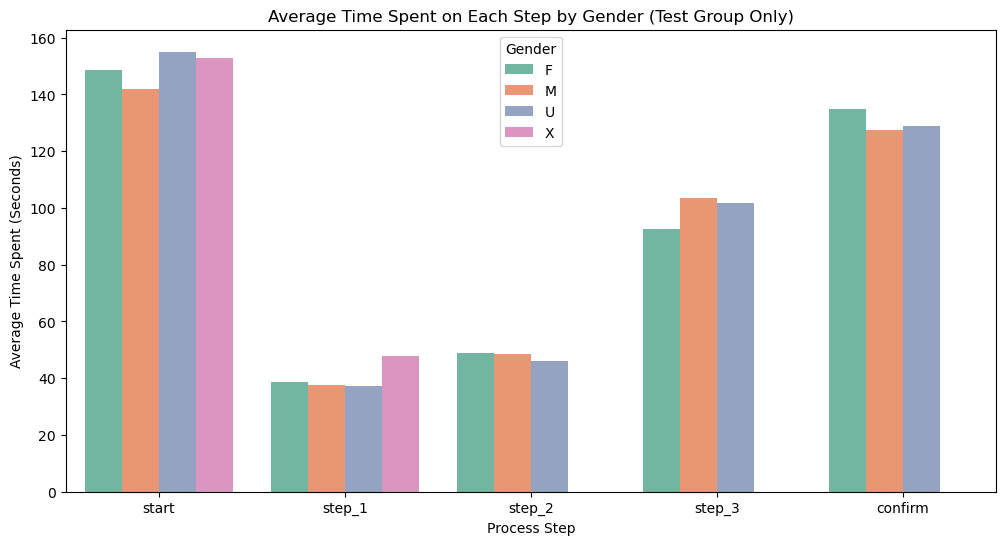

In [73]:
# Bar plot to visualize average time spent by gender and process step for Test group only
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='gendr', data=avg_time_by_gender_test, palette='Set2')
plt.title('Average Time Spent on Each Step by Gender (Test Group Only)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Gender')
plt.show()

In [75]:
# Group by gender and process step to calculate average time spent for Control group
avg_time_by_gender_control = df_control.groupby(['gendr', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_gender_control.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/1416746338.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_by_gender_control = df_control.groupby(['gendr', 'process_step'])['time_diff'].mean().reset_index()


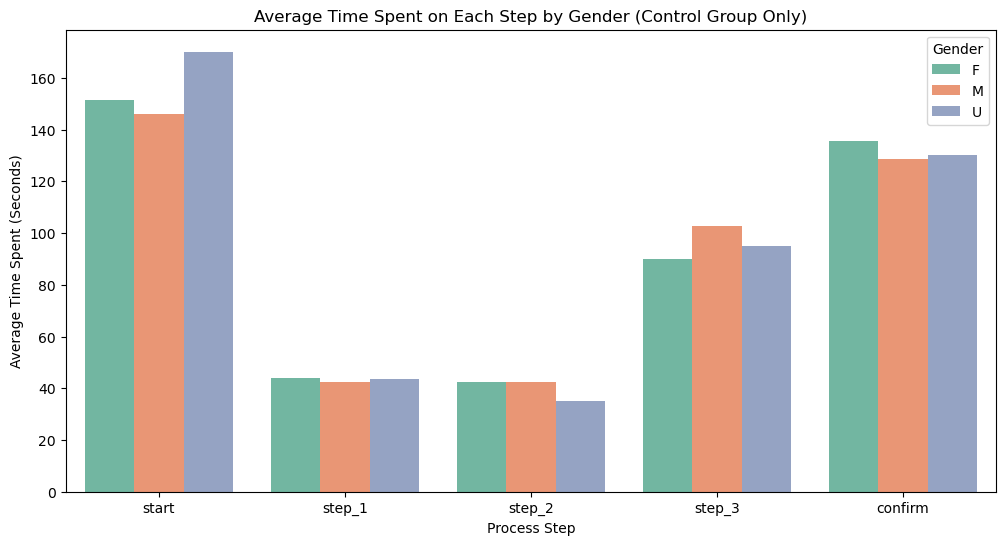

In [77]:
# Bar plot to visualize average time spent by gender and process step for Control group only
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='gendr', data=avg_time_by_gender_control, palette='Set2')
plt.title('Average Time Spent on Each Step by Gender (Control Group Only)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Gender')
plt.show()

---

# Customer Error Analysis

### Error Rate on each step

In [102]:
# Rename process steps as numerical values for easier comparison
step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df_sorted['step_numeric'] = df_sorted['process_step'].map(step_mapping).astype(int)  # Convert to int

# Identify errors (reversions to a lower step)
df_sorted['step_diff'] = df_sorted.groupby(['client_id', 'visit_id'])['step_numeric'].diff()
df_sorted['error'] = df_sorted['step_diff'] < 0  # Step difference is negative (reversion)

# Group by process step and calculate the error rate
error_rate_by_step = df_sorted.groupby(['process_step'])['error'].mean().reset_index()
display(error_rate_by_step)

# Calculate the overall average error rate
overall_avg_error_rate = df_sorted['error'].mean()
display(overall_avg_error_rate)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/3977019240.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_rate_by_step = df_sorted.groupby(['process_step'])['error'].mean().reset_index()


process_step     error
0        start  0.377815
1       step_1  0.083952
2       step_2  0.080570
3       step_3  0.003495
4      confirm  0.000000

0.1024295461621273

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/1797360308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_step', y='error', data=error_rate_by_step, palette='Blues_d')


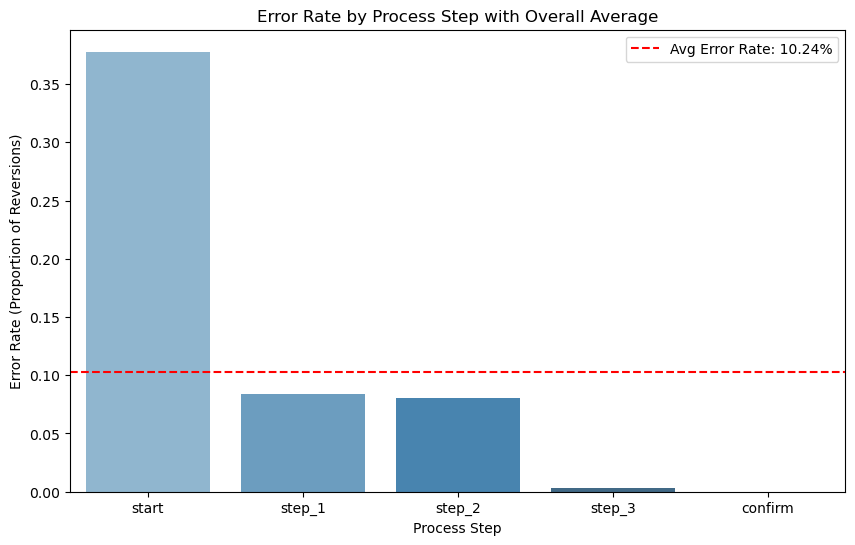

In [99]:
# Plotting the error rate by process step
plt.figure(figsize=(10, 6))
sns.barplot(x='process_step', y='error', data=error_rate_by_step, palette='Blues_d')
plt.axhline(overall_avg_error_rate, color='red', linestyle='--', label=f'Avg Error Rate: {overall_avg_error_rate:.2%}')
plt.title('Error Rate by Process Step with Overall Average')
plt.xlabel('Process Step')
plt.ylabel('Error Rate (Proportion of Reversions)')
plt.legend()
plt.show()

### Error rates by num_accts, and variation

In [117]:
# Calculate error rates by num_accts, and variation (Test/Control)
error_rate_by_accts = df_sorted.groupby(['age_group', 'num_accts', 'Variation'])['error'].mean().reset_index()
display(error_rate_by_accts)

/var/folders/1p/3nvyb0qn4zbfkzm72nmsffqh0000gn/T/ipykernel_33667/3324091069.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_rate_by_accts = df_sorted.groupby(['age_group', 'num_accts', 'Variation'])['error'].mean().reset_index()


age_group  num_accts  Variation     error
0      30-50        1.0    Control       NaN
1      30-50        1.0       Test  0.000000
2      30-50        1.0  undefined       NaN
3      30-50        2.0    Control  0.076686
4      30-50        2.0       Test  0.097636
5      30-50        2.0  undefined  0.092206
6      30-50        3.0    Control  0.080373
7      30-50        3.0       Test  0.087587
8      30-50        3.0  undefined  0.085589
9      30-50        4.0    Control  0.078707
10     30-50        4.0       Test  0.080690
11     30-50        4.0  undefined  0.084681
12     30-50        5.0    Control  0.063218
13     30-50        5.0       Test  0.065789
14     30-50        5.0  undefined  0.054688
15     30-50        6.0    Control  0.166667
16     30-50        6.0       Test  0.000000
17     30-50        6.0  undefined  0.000000
18     30-50        7.0    Control       NaN
19     30-50        7.0       Test  0.000000
20     30-50        7.0  undefined  0.166667
21     30-50        8.0    Control       NaN
22     30-50        8.0       Test       NaN
23     30-50        8.0  undefined       NaN
24     50-70        1.0    Control       NaN
25     50-70        1.0       Test       NaN
26     50-70        1.0  undefined  0.000000
27     50-70        2.0    Control  0.092596
28     50-70        2.0       Test  0.132537
29     50-70        2.0  undefined  0.117680
30     50-70        3.0    Control  0.082884
31     50-70        3.0       Test  0.125050
32     50-70        3.0  undefined  0.113574
33     50-70        4.0    Control  0.089917
34     50-70        4.0       Test  0.109062
35     50-70        4.0  undefined  0.092320
36     50-70        5.0    Control  0.084175
37     50-70        5.0       Test  0.108772
38     50-70        5.0  undefined  0.080189
39     50-70        6.0    Control  0.028571
40     50-70        6.0       Test  0.122807
41     50-70        6.0  undefined  0.034483
42     50-70        7.0    Control  0.263158
43     50-70        7.0       Test  0.000000
44     50-70        7.0  undefined  0.000000
45     50-70        8.0    Control       NaN
46     50-70        8.0       Test       NaN
47     50-70        8.0  undefined  0.000000

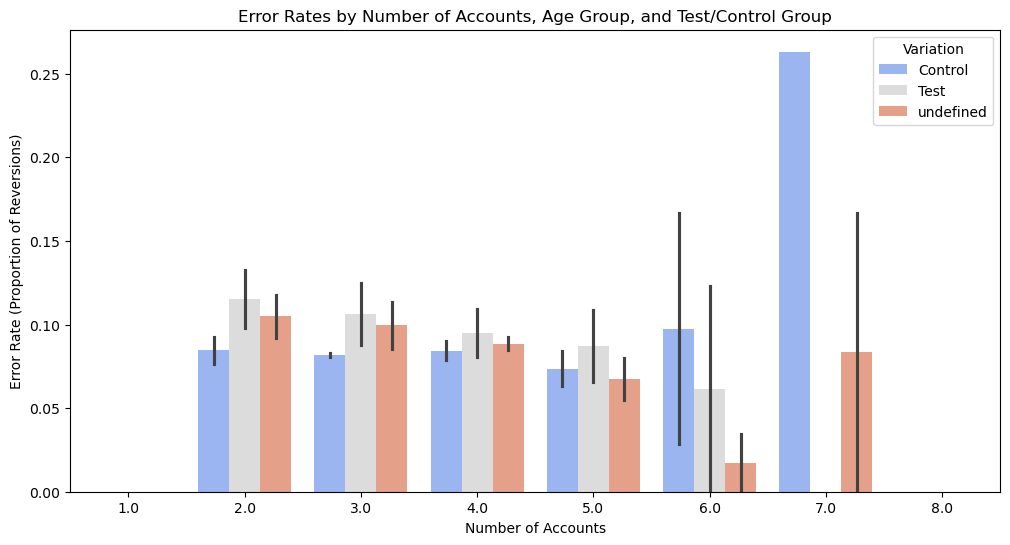

In [119]:
# Visualize the error rates by number of accounts, age group, and variation
plt.figure(figsize=(12, 6))
sns.barplot(x='num_accts', y='error', hue='Variation', data=error_rate_by_accts, palette='coolwarm')
plt.title('Error Rates by Number of Accounts, Age Group, and Test/Control Group')
plt.xlabel('Number of Accounts')
plt.ylabel('Error Rate (Proportion of Reversions)')
plt.legend(title='Variation')
plt.show()